In [1]:
import pybamm

In [2]:
model = pybamm.BaseModel()

In [3]:
L = pybamm.Variable('SEI thickness')
R = pybamm.Parameter('Reaction')

In [4]:
model.rhs = {L: R}

In [5]:
model.initial_conditions = {L: pybamm.Scalar(0)}

In [6]:
model.variables = {'SEI thickness': L, 'SEI thickness times R': L * R}

In [7]:
# using the model
param = pybamm.ParameterValues({'Reaction': 2})

In [8]:
param.process_model(model)

In [10]:
disc = pybamm.Discretisation()
disc.process_model(model)
# even though there is no mesh, you need to define a discretisation for postprocessing purposes

In [12]:
solver = pybamm.ScipySolver()

In [13]:
import numpy as np

In [14]:
t = np.linspace(0,1,100)

In [16]:
solution = solver.solve(model, t)

In [17]:
L_out = pybamm.ProcessedVariable(model.variables['SEI thickness'], solution.t, solution.y)

In [23]:
import matplotlib.pyplot as plt

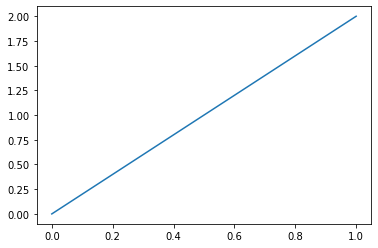

In [25]:
plt.plot(t, L_out(t))